In [44]:
import pandas as pd

In [43]:
import matplotlib

In [41]:
import geopandas

In [42]:
from shapely.geometry import Point, Polygon

In [5]:
pd.options.display.max_rows = 10

In [6]:
stations = geopandas.read_file("velib-disponibilite-en-temps-reel.geojson")

In [9]:
stations[['name', 'numdocksavailable', 'numbikesavailable', 'geometry']].head()

name  numdocksavailable  numbikesavailable  \
0              None                 18                 12   
1              None                 33                  2   
2  Athènes - Clichy                 13                  7   
3   Bassano -  Iéna                  8                  6   
4              None                 56                  2   

                              geometry  
0                                 None  
1                                 None  
2  POINT (2.32956021946 48.8781137879)  
3  POINT (2.29614960099 48.8681445105)  
4                                 None

In [18]:
quartiers = geopandas.read_file("quartier_paris.geojson")

In [33]:
quartiers.head()

n_sq_qu    perimetre  objectid     longueur  c_qu        surface  \
0  750000010  2139.625388        50  2139.535591    10  271750.323937   
1  750000016  3283.163371        56  3282.999717    16  378252.153674   
2  750000018  4052.729521        58  4052.473226    18  798389.398463   
3  750000025  3827.253353         7  3827.053421    25  826559.436780   
4  750000035  2786.541926        17  2786.448978    35  417335.080621   

     n_sq_ar  c_quinsee                  l_qu  c_ar  \
0  750000003    7510302        Enfants-Rouges     3   
1  750000004    7510404            Notre-Dame     4   
2  750000005    7510502    Jardin-des-Plantes     5   
3  750000007    7510701  Saint-Thomas-d'Aquin     7   
4  750000009    7510903   Faubourg-Montmartre     9   

                                            geometry  
0  POLYGON ((2.367101341254551 48.86162755885409,...  
1  POLYGON ((2.361313701339139 48.84858030437791,...  
2  POLYGON ((2.364561460891576 48.84365746114398,...  
3  POLYGON ((2.322133508640103 48.84924973446431,...  
4  POLYGON ((2.340255299125085 48.87660144727086,...

In [10]:
type(stations)

geopandas.geodataframe.GeoDataFrame

In [11]:
stations.geometry

0                                     None
1                                     None
2      POINT (2.32956021946 48.8781137879)
3      POINT (2.29614960099 48.8681445105)
4                                     None
5                                     None
6      POINT (2.36682649963 48.8348484529)
7                                     None
8                                     None
9                                     None
10     POINT (2.27435453918 48.8687784918)
11                                    None
12                                    None
13     POINT (2.26825738753 48.8498691876)
14                                    None
15     POINT (2.39607900821 48.8971300531)
16                                    None
17     POINT (2.38654145444 48.8863936794)
18                                    None
19                                    None
20                                    None
21     POINT (2.29924407695 48.8486563159)
22      POINT (2.3278616533 48.8223409659)
23         

In [12]:
type(stations.geometry)

geopandas.geoseries.GeoSeries

In [13]:
type(stations.geometry[2])

shapely.geometry.point.Point

In [18]:
quartiers.geometry.area

0     0.000033
1     0.000046
2     0.000098
3     0.000101
4     0.000051
        ...   
75    0.000225
76    0.000099
77    0.000782
78    0.000203
79    0.000134
Length: 80, dtype: float64

In [19]:
notre_dame = Point(2.35005149954546, 48.85293695)

In [21]:
quartiers.contains(notre_dame)

0     False
1      True
2     False
3     False
4     False
      ...  
75    False
76    False
77    False
78    False
79    False
Length: 80, dtype: bool

In [22]:
quartiers[quartiers.contains(notre_dame)]

n_sq_qu    perimetre  objectid     longueur  c_qu        surface  \
1  750000016  3283.163371        56  3282.999717    16  378252.153674   

     n_sq_ar  c_quinsee        l_qu  c_ar  \
1  750000004    7510404  Notre-Dame     4   

                                            geometry  
1  POLYGON ((2.361313701339139 48.84858030437791,...

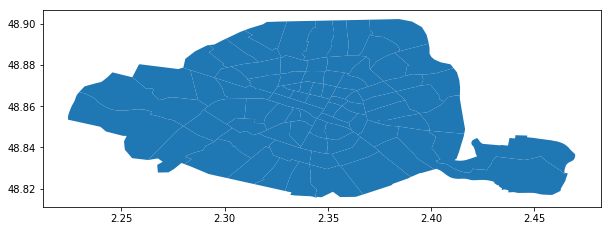

In [29]:
quartiers.plot(figsize=(10, 10))

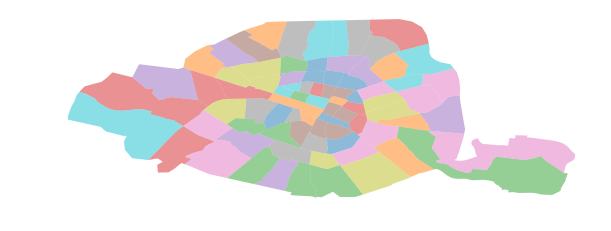

In [24]:
ax = quartiers.plot(figsize=(10, 10), cmap='tab10', alpha=0.5)
ax.set_axis_off()

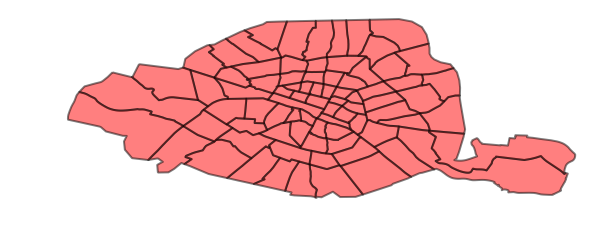

In [25]:
ax = quartiers.plot(figsize=(10, 10), edgecolor='k', facecolor='r', alpha=0.5, linewidth=2)
ax.set_axis_off()

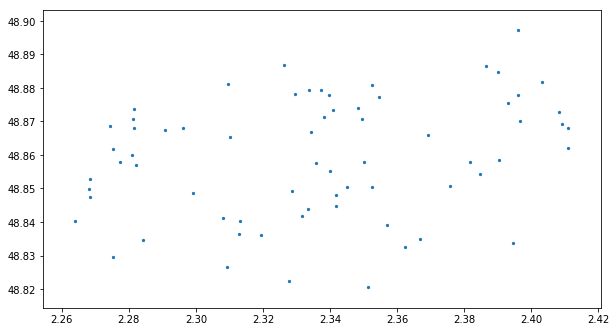

In [18]:
stations.plot(markersize=5, figsize=(10, 10))

In [2]:
streets = geopandas.read_file("openstreetmap_paris/shape/")

In [22]:
streets.head()

osm_id                 name       type  \
0  4082329  Bassin de l'Arsenal  riverbank   
1  4082341             La Seine  riverbank   
2  4083189        Parc de Bercy       park   
3  4221369   Jardin des Plantes       park   
4  4263378          Grand Canal      water   

                                            geometry  
0  POLYGON ((2.3689929 48.8518363, 2.3681996 48.8...  
1  POLYGON ((2.3382918 48.8575843, 2.3380675 48.8...  
2  POLYGON ((2.3781519 48.8372911, 2.3782541 48.8...  
3  POLYGON ((2.3638635 48.8447426, 2.3638475 48.8...  
4  POLYGON ((2.0884757 48.812497, 2.0883668 48.81...

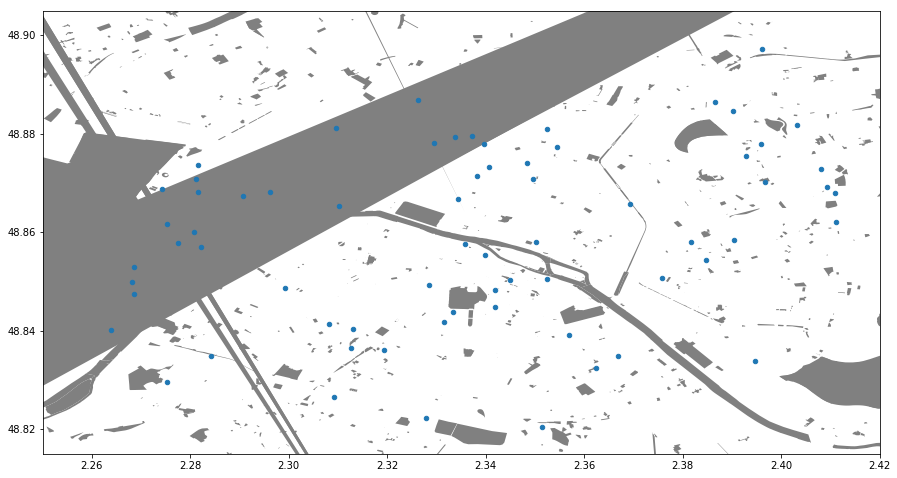

In [39]:
ax = streets.plot(linewidth=0.5, color='grey', figsize=(15, 10))
stations.plot(ax=ax, markersize=20)
ax.set(xlim=(2.25, 2.42), ylim=(48.815, 48.905));
ax.set_axis_on()

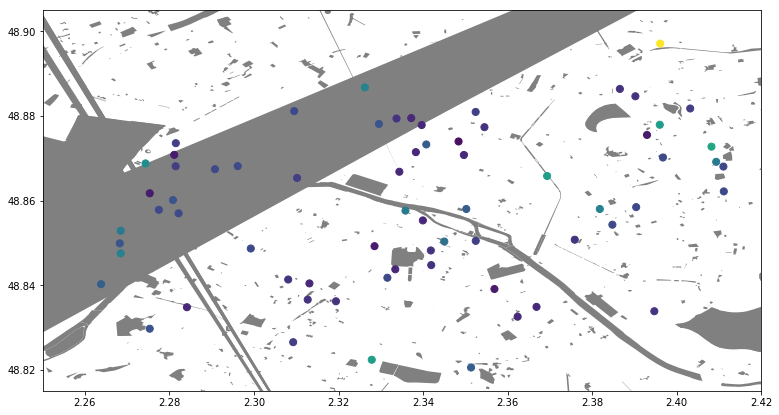

In [38]:
ax = streets.plot(linewidth=0.5, color='grey', figsize=(15, 7))
stations.plot(ax=ax, column='numbikesavailable', markersize=50)#, legend=True)
ax.set(xlim=(2.25, 2.42), ylim=(48.815, 48.905));
ax.set_axis_on()

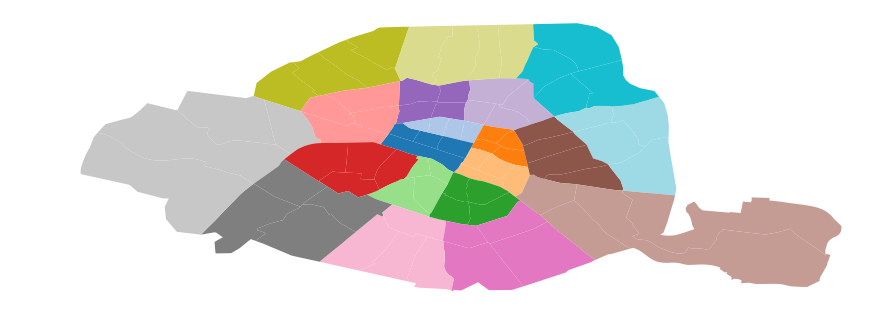

In [19]:
ax = quartiers.plot(column='n_sq_ar', categorical=True, cmap='tab20', figsize=(15, 8))
ax.set_axis_off()

In [45]:
import rtree

ImportError: No module named 'rtree'

In [46]:
stations = geopandas.sjoin(stations, quartiers[['l_qu', 'geometry']].copy(), op='within')

ImportError: No module named 'rtree'

In [47]:
stations.head()

numbikesavailable  last_reported  station_id  is_installed  is_renting  \
0                 12     1517662974    35101194             1           1   
1                  2     1517651035    37936869             1           1   
2                  7     1517662956        7261             1           1   
3                  6     1517662849        7304             1           1   
4                  2     1517662797    39149651             1           1   

   numdocksavailable  is_returning  capacity              name      lon  \
0                 18             1       NaN              None      NaN   
1                 33             1       NaN              None      NaN   
2                 13             1      20.0  Athènes - Clichy  2.32956   
3                  8             1      14.0   Bassano -  Iéna  2.29615   
4                 56             1       NaN              None      NaN   

         lat                             geometry  
0        NaN                                 None  
1        NaN                                 None  
2  48.878114  POINT (2.32956021946 48.8781137879)  
3  48.868145  POINT (2.29614960099 48.8681445105)  
4        NaN                                 None

In [48]:
counts = stations.groupby('l_qu').size()

KeyError: 'l_qu'

In [49]:
quartiers = quartiers.merge(counts.reset_index(name='number_bike_stations'))

NameError: name 'counts' is not defined

In [50]:
quartiers.head()

n_sq_qu    perimetre  objectid     longueur  c_qu        surface  \
0  750000010  2139.625388        50  2139.535591    10  271750.323937   
1  750000016  3283.163371        56  3282.999717    16  378252.153674   
2  750000018  4052.729521        58  4052.473226    18  798389.398463   
3  750000025  3827.253353         7  3827.053421    25  826559.436780   
4  750000035  2786.541926        17  2786.448978    35  417335.080621   

     n_sq_ar  c_quinsee                  l_qu  c_ar  \
0  750000003    7510302        Enfants-Rouges     3   
1  750000004    7510404            Notre-Dame     4   
2  750000005    7510502    Jardin-des-Plantes     5   
3  750000007    7510701  Saint-Thomas-d'Aquin     7   
4  750000009    7510903   Faubourg-Montmartre     9   

                                            geometry  
0  POLYGON ((2.367101341254551 48.86162755885409,...  
1  POLYGON ((2.361313701339139 48.84858030437791,...  
2  POLYGON ((2.364561460891576 48.84365746114398,...  
3  POLYGON ((2.322133508640103 48.84924973446431,...  
4  POLYGON ((2.340255299125085 48.87660144727086,...

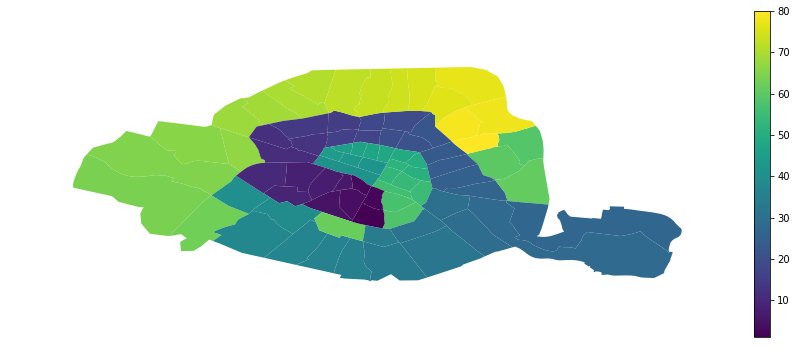

In [84]:
ax = quartiers.plot(column='objectid', figsize=(15, 6), legend=True)
ax.set_axis_off()

In [85]:
quartiers['number_bike_stations'] = quartiers['objectid'] / quartiers.geometry.area

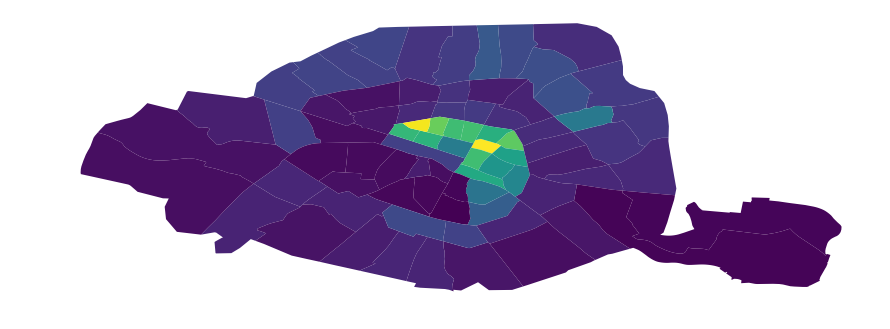

In [86]:
ax = quartiers.plot(column='number_bike_stations', figsize=(15, 6))
ax.set_axis_off()

In [54]:
stations.crs

{'init': 'epsg:4326'}

In [55]:
stations.geometry.head(3)

0                                   None
1                                   None
2    POINT (2.32956021946 48.8781137879)
Name: geometry, dtype: object

In [87]:
stations2 = stations.to_crs(epsg=32631)

AttributeError: 'NoneType' object has no attribute 'is_empty'

In [88]:
stations2.geometry.head(3)

NameError: name 'stations2' is not defined

In [60]:
quartiers2 = quartiers.to_crs(epsg=32631)

In [61]:
(quartiers2.geometry.area / 1000**2)

0     0.271603
1     0.378054
2     0.797983
3     0.826127
4     0.417104
5     0.500154
6     0.471852
7     0.608698
8     0.929117
9     1.901972
10    0.868538
11    1.294254
12    1.464259
13    1.377745
14    0.213201
15    0.293207
16    0.860867
17    0.807456
18    0.716690
19    7.201383
20    2.230432
21    1.357300
22    1.784082
23    0.273549
24    2.374831
25    2.607729
26    5.475037
27    1.423272
28    0.277991
29    0.367532
        ...   
50    1.235274
51    1.180965
52    2.827822
53    1.477546
54    1.486139
55    1.598127
56    1.125644
57    1.904462
58    1.346754
59    1.284961
60    0.243418
61    0.703275
62    0.282132
63    1.073169
64    1.381170
65    0.796153
66    0.760312
67    1.181811
68    0.837539
69    1.171460
70    3.042683
71    0.691725
72    0.412237
73    0.269311
74    0.187910
75    1.834668
76    0.806119
77    6.380679
78    1.652756
79    1.088591
Length: 80, dtype: float64

In [71]:
us = geopandas.read_file("FR001L1_PARIS_UA2012.shp")

In [72]:
us.head()

geometry
0  POLYGON ((3740677.8463 2823773.7809, 3740677.5...
1  POLYGON ((3772430.4757 2824288.7687, 3772427.2...
2  POLYGON ((3772264.735400001 2824271.779100001,...
3  POLYGON ((3772082.582900001 2824308.658399999,...
4  POLYGON ((3772439.3181 2824314.791999999, 3772...

In [74]:
us.crs

{}

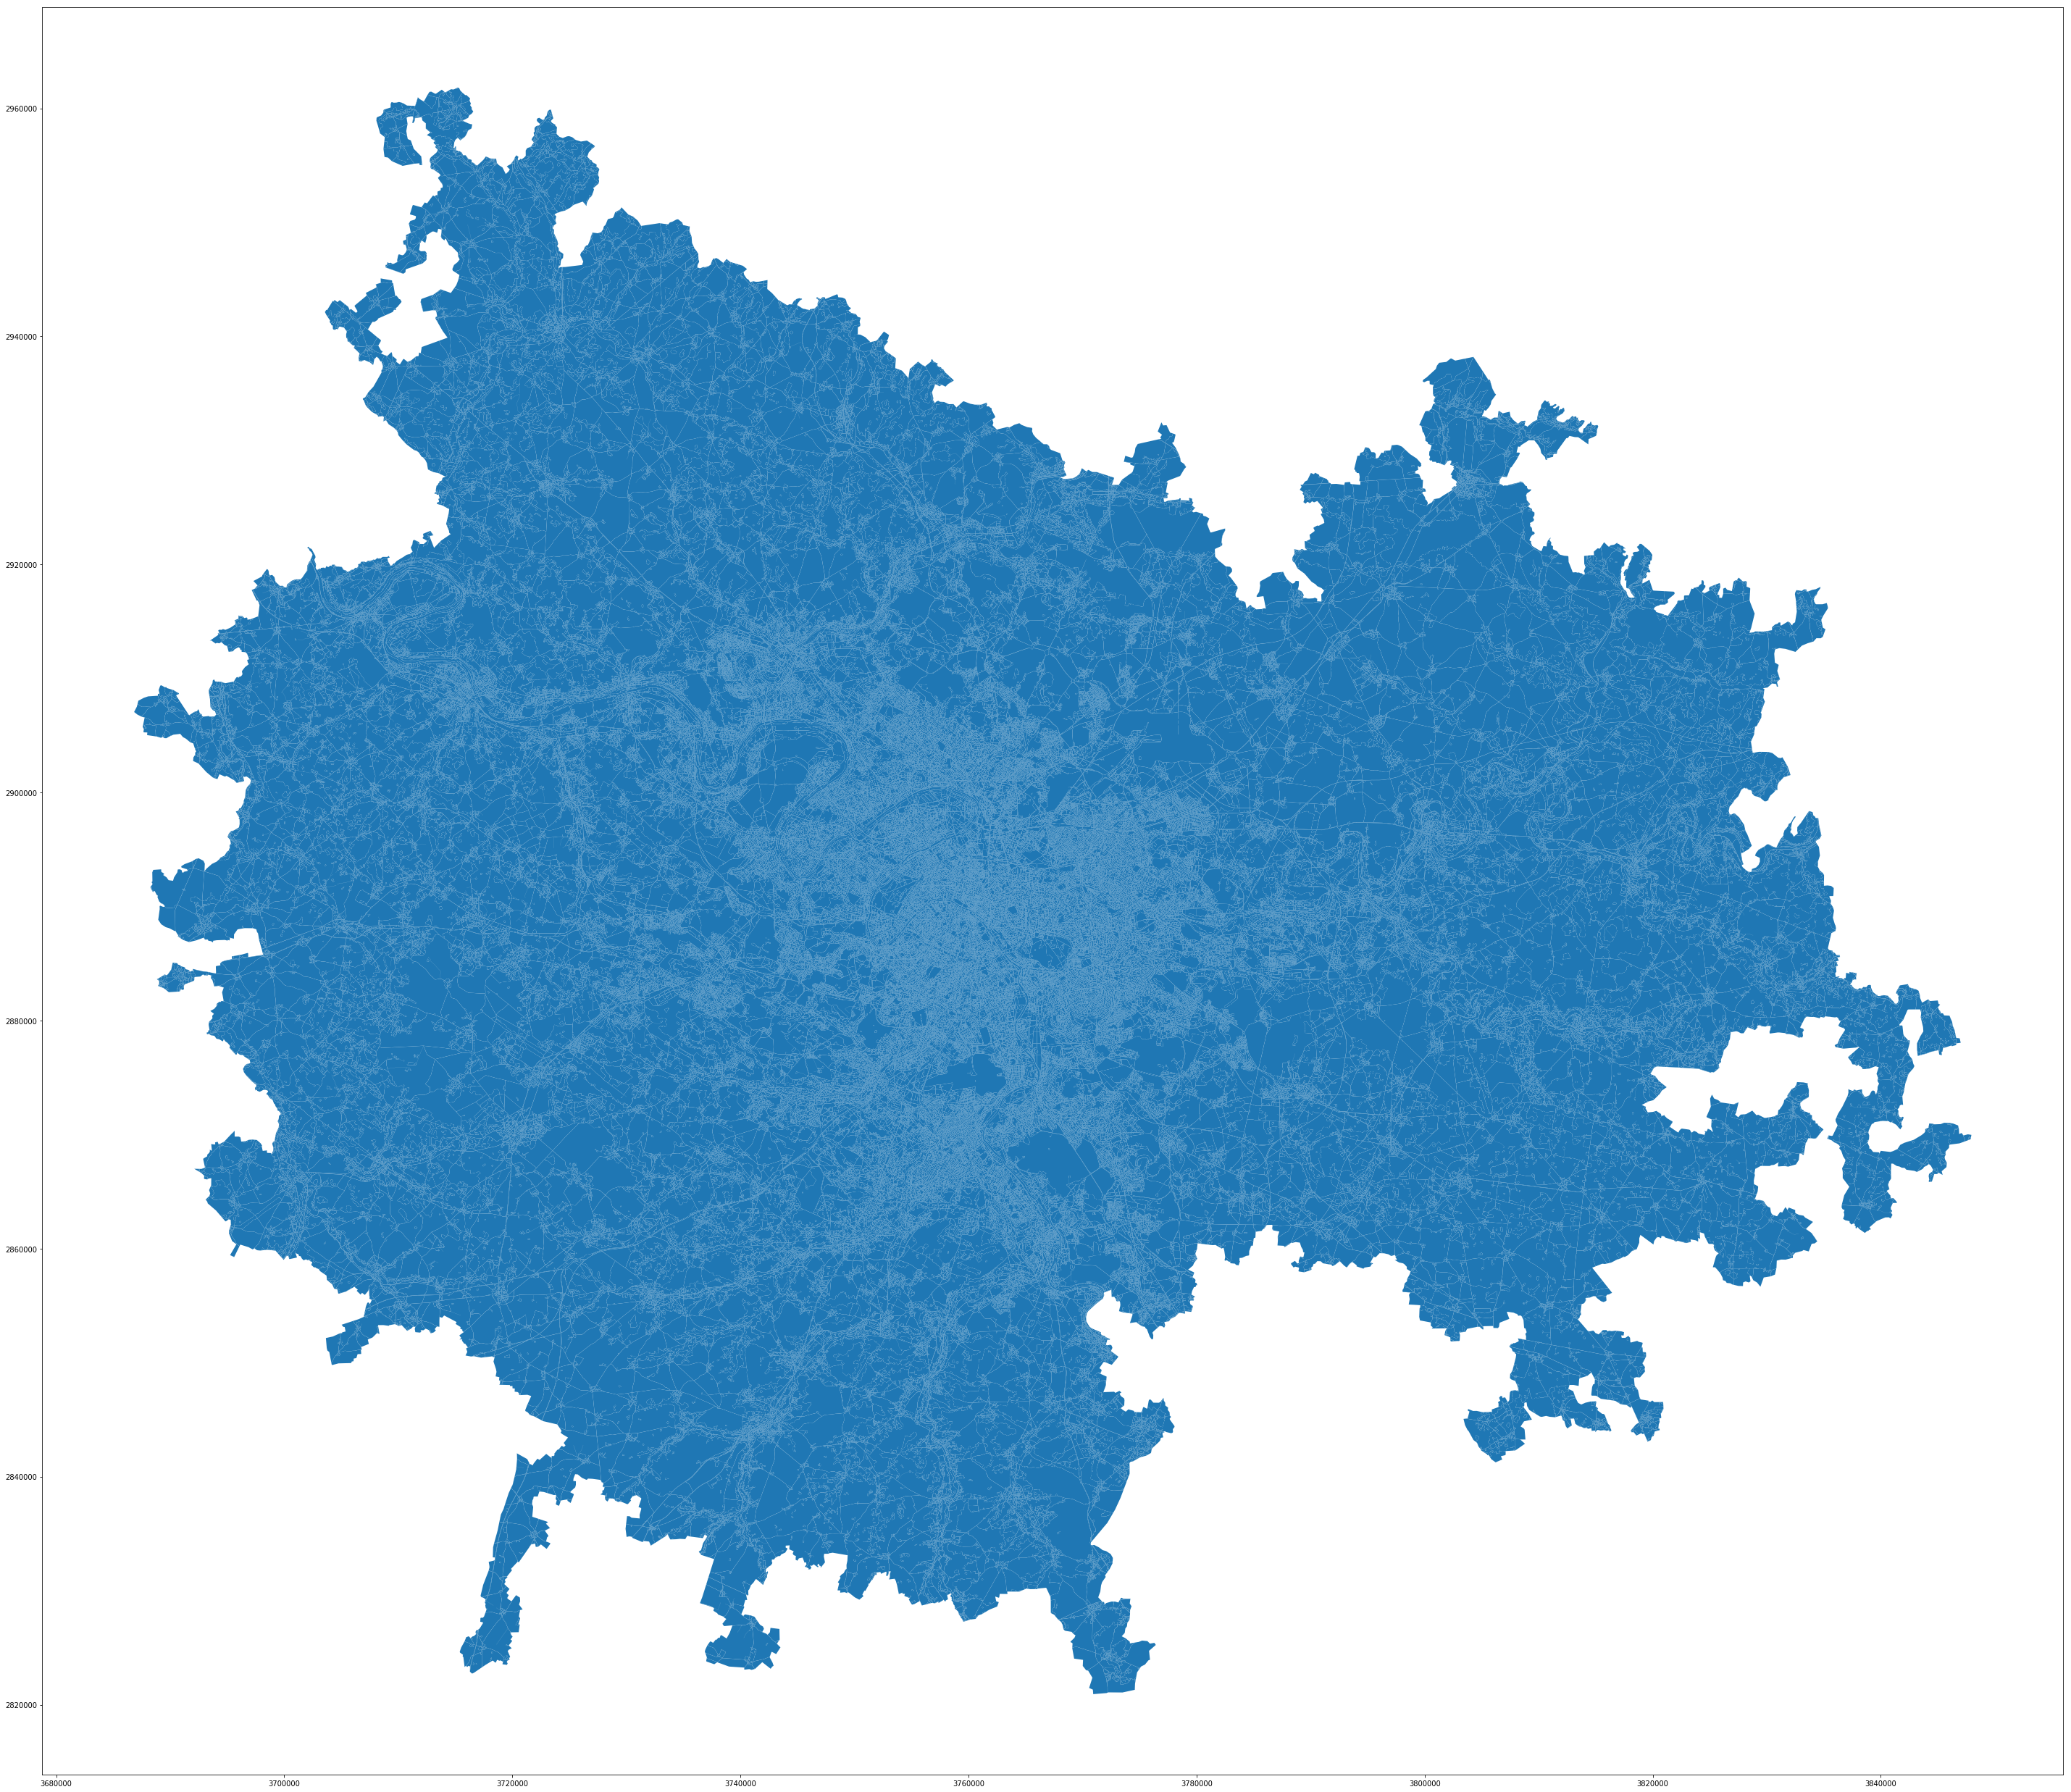

In [89]:
ax = us.plot(figsize=(50,50))
ax.set_axis_on()

In [76]:
ax = us.plot(column='ITEM', figsize=(20,20), legend=True, cmap='tab20')
ax.set_axis_off()

KeyError: 'ITEM'

In [78]:
pd.options.display.max_rows = 60

In [79]:
us.ITEM.value_counts()

AttributeError: 'GeoDataFrame' object has no attribute 'ITEM'

In [80]:
us.groupby('ITEM')['geometry'].agg(lambda x: x.area.sum()).sort_values(ascending=False)

KeyError: 'ITEM'

In [81]:
us[us.ITEM == 'Green urban areas'].geometry.area.hist(bins=np.arange(0, 1000000, 50000))

AttributeError: 'GeoDataFrame' object has no attribute 'ITEM'